In [1]:
import pandas as pd
import numpy as np 
import seaborn as sns
import glob, os
from IPython.display import Image
from sklearn.preprocessing import StandardScaler
from sklearn.svm import LinearSVR, SVR
from sklearn import metrics
from sklearn.linear_model import LinearRegression,Ridge
import statsmodels.api as sm
from sklearn import linear_model
from sklearn.tree import DecisionTreeRegressor
from sklearn.decomposition import PCA
from sklearn.feature_selection import SelectFromModel
from sklearn.feature_selection import RFE
from sklearn import tree
import pydotplus
from sklearn.externals.six import StringIO
import matplotlib.pyplot as plt
%matplotlib inline
from collections import Counter
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2, f_regression
from sklearn.feature_selection import f_regression
from sklearn.linear_model import ElasticNet
import forward_selection as fs
from scipy.stats import chi2_contingency, pearsonr, spearmanr

## Préparation de la base

In [2]:
dft11 = pd.read_csv("la_base.csv", encoding="latin1")

In [3]:
dft11.columns

Index(['d?partement', 'code', 'Ann?e', 'taux_Blancs et nuls', 'taux_xdroite',
       'taux_gauche', 'taux_Abstention', 'taux_xgauche', 'taux_centre',
       'taux_vert', 'taux_droite', 'depart_frontalier', 'depart_OM',
       'depart_CORSE', '0-19ans', '20-39ans', '40-59ans', '60-74ans', '75+ans',
       'Total', 'Naissances domicili?es par d?partement',
       'Nombre total de mariages domicili?s',
       'D?c?s domicili?s par d?partement', 'Q1_rate', 'Q2_rate', 'Q3_rate',
       'Q4_rate', 'var_chomage_annee', 'taux_chomage',
       'taux_centre_sup_moyenne', 'taux_droite_sup_moyenne',
       'taux_gauche_sup_moyenne', 'taux_vert_sup_moyenne',
       'taux_xdroite_sup_moyenne', 'taux_xgauche_sup_moyenne',
       'taux_Abstention_sup_moyenne', 'taux_Blancs et nuls_sup_moyenne',
       'Date', 'pop_verts', 'pop_centre', 'pop_droite', 'pop_gauche',
       'pop_xdroite', 'pop_xgauche', 'pop_premier_ministre', 'cohabitation',
       'pop_president', 'droite_au_pouvoir', 'Dissident', 'Supe

In [4]:
dft11.columns

Index(['d?partement', 'code', 'Ann?e', 'taux_Blancs et nuls', 'taux_xdroite',
       'taux_gauche', 'taux_Abstention', 'taux_xgauche', 'taux_centre',
       'taux_vert', 'taux_droite', 'depart_frontalier', 'depart_OM',
       'depart_CORSE', '0-19ans', '20-39ans', '40-59ans', '60-74ans', '75+ans',
       'Total', 'Naissances domicili?es par d?partement',
       'Nombre total de mariages domicili?s',
       'D?c?s domicili?s par d?partement', 'Q1_rate', 'Q2_rate', 'Q3_rate',
       'Q4_rate', 'var_chomage_annee', 'taux_chomage',
       'taux_centre_sup_moyenne', 'taux_droite_sup_moyenne',
       'taux_gauche_sup_moyenne', 'taux_vert_sup_moyenne',
       'taux_xdroite_sup_moyenne', 'taux_xgauche_sup_moyenne',
       'taux_Abstention_sup_moyenne', 'taux_Blancs et nuls_sup_moyenne',
       'Date', 'pop_verts', 'pop_centre', 'pop_droite', 'pop_gauche',
       'pop_xdroite', 'pop_xgauche', 'pop_premier_ministre', 'cohabitation',
       'pop_president', 'droite_au_pouvoir', 'Dissident', 'Supe

In [5]:
dft11["taux_bgauche"] = dft11['taux_xgauche']+ dft11['taux_gauche'] + dft11['taux_vert']
dft11["taux_bdroite"] = dft11['taux_droite']+ dft11['taux_centre']

In [6]:
dft11.head()

,d?partement,code,Ann?e,taux_Blancs et nuls,taux_xdroite,taux_gauche,taux_Abstention,taux_xgauche,taux_centre,taux_vert,...,subventions,conjoncture travaux publics-opinions sur le carnet de commandes,capacit? epargne actuelle (augmentation moins diminution),opportunite epargner(favorable moins favorable),capacite epargne future(am?lioration moins deterioration),densit?_m?decins,consommation menages - electricite,nombre de logement vacant,taux_bgauche,taux_bdroite
0,AIN,1,1981.0,1.604750,0.000000,27.982284,27.940015,14.888346,31.660729,4.226724,...,-1797.75,-48.00,8.333333,-31.916667,-18.666667,84.34,21650,NaN,47.097355,52.902645
1,AIN,1,1988.0,1.879541,16.041776,31.377812,23.877703,8.171024,21.290640,4.065072,...,-3613.50,1.00,4.666667,6.333333,-9.833333,108.59,41112,1891.0,43.613907,40.344317
2,AIN,1,1995.0,3.155125,19.751523,20.553725,25.807688,11.073277,19.814177,3.932995,...,-3850.00,-47.25,9.166667,28.500000,-10.166667,127.35,56611,1949.0,35.559996,44.688481
3,AIN,1,2002.0,3.540833,25.246258,20.716478,37.217333,11.320086,8.927322,7.374661,...,-4745.00,-28.00,11.833333,24.750000,-3.250000,127.56,77698,1954.0,39.411224,35.342518
4,AIN,1,2007.0,1.344946,12.233715,20.826783,16.571575,6.279643,19.637678,3.020936,...,-3140.75,27.75,5.250000,25.583333,-8.083333,123.76,95093,2014.0,30.127362,57.638923


In [7]:
dft11["taux_sortie_sans_bloc"] = np.nan 
dft11.ix[dft11["Ann?e"]==1981,"taux_sortie_sans_bloc"] = dft11.ix[dft11["Ann?e"]==1981,"taux_centre"]
dft11.ix[dft11["Ann?e"]==1988,"taux_sortie_sans_bloc"] = dft11.ix[dft11["Ann?e"]==1988,"taux_gauche"]
dft11.ix[dft11["Ann?e"]==1995,"taux_sortie_sans_bloc"] = dft11.ix[dft11["Ann?e"]==1995,"taux_gauche"]
dft11.ix[dft11["Ann?e"]==2002,"taux_sortie_sans_bloc"] = dft11.ix[dft11["Ann?e"]==2002,"taux_droite"]
dft11.ix[dft11["Ann?e"]==2007,"taux_sortie_sans_bloc"] = dft11.ix[dft11["Ann?e"]==2007,"taux_droite"]
dft11.ix[dft11["Ann?e"]==2012,"taux_sortie_sans_bloc"] = dft11.ix[dft11["Ann?e"]==2012,"taux_droite"]

In [8]:
dft11["taux_sortie_avec_bloc"] = np.nan 
dft11.ix[dft11["Ann?e"]==1981,"taux_sortie_avec_bloc"] = dft11.ix[dft11["Ann?e"]==1981,"taux_centre"] +\
dft11.ix[dft11["Ann?e"]==1981,"taux_droite"]
dft11.ix[dft11["Ann?e"]==1988,"taux_sortie_avec_bloc"] = dft11.ix[dft11["Ann?e"]==1988,"taux_gauche"]+\
dft11.ix[dft11["Ann?e"]==1988,"taux_xgauche"] + dft11.ix[dft11["Ann?e"]==1988,"taux_vert"]
        
dft11.ix[dft11["Ann?e"]==1995,"taux_sortie_avec_bloc"] = dft11.ix[dft11["Ann?e"]==1995,"taux_gauche"]+\
dft11.ix[dft11["Ann?e"]==1995,"taux_xgauche"] + dft11.ix[dft11["Ann?e"]==1995,"taux_vert"]

dft11.ix[dft11["Ann?e"]==2002,"taux_sortie_avec_bloc"] = dft11.ix[dft11["Ann?e"]==2002,"taux_droite"]+\
dft11.ix[dft11["Ann?e"]==2002,"taux_centre"]
dft11.ix[dft11["Ann?e"]==2007,"taux_sortie_avec_bloc"] = dft11.ix[dft11["Ann?e"]==2007,"taux_droite"]+\
dft11.ix[dft11["Ann?e"]==2007,"taux_centre"]
dft11.ix[dft11["Ann?e"]==2012,"taux_sortie_avec_bloc"] = dft11.ix[dft11["Ann?e"]==2012,"taux_droite"]+\
dft11.ix[dft11["Ann?e"]==2012,"taux_centre"]

In [9]:
#Taux_supp_moyenne sortant
#Popularité sortant 

dft11["ecart_pop"] = dft11["pop_president"] - dft11["pop_premier_ministre"] 
dft11["pop_exec"] = np.nan 
dft11.ix[dft11["Ann?e"]==1981,"pop_exec"] = dft11.ix[dft11["Ann?e"]==1981,"pop_president"].iloc[0]
dft11.ix[dft11["Ann?e"]==1988,"pop_exec"] = dft11.ix[dft11["Ann?e"]==1988,"pop_president"].iloc[0]
dft11.ix[dft11["Ann?e"]==2012,"pop_exec"] = dft11.ix[dft11["Ann?e"]==2012,"pop_president"].iloc[0]
dft11.ix[dft11["Ann?e"]==1995,"pop_exec"] = dft11.ix[dft11["Ann?e"]==1995,"pop_premier_ministre"].iloc[0]
dft11.ix[dft11["Ann?e"]==2002,"pop_exec"] = dft11.ix[dft11["Ann?e"]==2002,"pop_premier_ministre"].iloc[0]
dft11.ix[dft11["Ann?e"]==2007,"pop_exec"] = dft11.ix[dft11["Ann?e"]==2007,"pop_premier_ministre"].iloc[0]

dft11.ix[dft11["Ann?e"]==1981,"pop_xdroite"] = dft11.ix[dft11["Ann?e"]==1988,"pop_xdroite"].iloc[0]
dft11.ix[dft11["Ann?e"]==1981,"pop_verts"] = dft11.ix[dft11["Ann?e"]==1995,"pop_verts"].iloc[0]
dft11.ix[dft11["Ann?e"]==1988,"pop_verts"] = dft11.ix[dft11["Ann?e"]==1995,"pop_verts"].iloc[0]

dft11.ix[dft11["Ann?e"]==1981,"nombre de logement vacant"] = 1891.

In [10]:
# On rajoute après coup l'option fn qui permet de supprimer l'année 1981

In [11]:
def create_train(target, dft11, option_fn=False):
    dft11["CORS88"] = dft11.apply(lambda row : 1 if row["Ann?e"]==1988 and 
                              row["code"] in ["2A","2B"] else 0, axis=1)

    dft11["CORS02"] = dft11.apply(lambda row : 1 if row["Ann?e"]==2002 and 
                              row["code"] in ["2A","2B"] else 0, axis=1)
    
    dft12 = dft11.drop(["code", 'taux_Blancs et nuls', 'taux_droite', 'taux_xgauche',\
                    'taux_vert','taux_centre', 'Q1_rate', 'Q2_rate', 'Q3_rate', 'Q4_rate', "Total", \
                   'depart_OM', "Date","taux_Abstention_sup_moyenne",'taux_Blancs et nuls_sup_moyenne',
                        'depart_CORSE'], axis=1)
    
    dft12["Date"] = dft12["Ann?e"] - 1981
    


    
    list_dell = ["Ann?e","d?partement","taux_bgauche",'taux_Abstention',"taux_sortie_sans_bloc",
                "taux_sortie_avec_bloc","taux_gauche", 'taux_xdroite',"taux_bdroite"]

    
    
    
    if option_fn==True:
        dft12 = dft12[dft12["Ann?e"]!=1981]
        

    
    df_train_x = dft12.drop(list_dell, axis=1)
    df_train_y = dft12[target]
    
    return df_train_x, df_train_y

In [12]:
def create_train_and_test(target, dft11, option_fn=False):

    dft11["CORS88"] = dft11.apply(lambda row : 1 if row["Ann?e"]==1988 and 
                              row["code"] in ["2A","2B"] else 0, axis=1)

    dft11["CORS02"] = dft11.apply(lambda row : 1 if row["Ann?e"]==2002 and 
                              row["code"] in ["2A","2B"] else 0, axis=1)
    
    dft12 = dft11.drop(["code", 'taux_Blancs et nuls', 'taux_droite', 'taux_xgauche',\
                    'taux_vert','taux_centre', 'Q1_rate', 'Q2_rate', 'Q3_rate', 'Q4_rate', "Total", \
                   'depart_OM', "Date","taux_Abstention_sup_moyenne",'taux_Blancs et nuls_sup_moyenne',
                        'depart_CORSE'], axis=1)
    
    dft12["Date"] = dft12["Ann?e"] - 1981
    


    
    list_dell = ["Ann?e","d?partement","taux_bgauche",'taux_Abstention',"taux_sortie_sans_bloc",
                "taux_sortie_avec_bloc","taux_gauche", 'taux_xdroite',"taux_bdroite"]

    
    df_train = dft12[dft12["Ann?e"]!=2012]
    
    if option_fn==True:
        df_train = df_train[df_train["Ann?e"]!=1981]
        
    df_test = dft12[dft12["Ann?e"]==2012]
    
    df_train_x = df_train.drop(list_dell, axis=1)
    df_train_y = df_train[target]
    df_test_x = df_test.drop(list_dell, axis=1)
    df_test_y = df_test[target]
    
    return df_train_x, df_train_y, df_test_x, df_test_y

In [13]:
def target_and_predict(target, dft11, estimator, importance_features=False,  option_fn=False):

    df_train_x, df_train_y, df_test_x, df_test_y = create_train_and_test(target, dft11,  option_fn=option_fn)
   
    svr.fit(df_train_x, df_train_y)
    print("Avec l'estimateur %s" % str(estimator))
    print("Approche %s" % target)
    print("Nb itération : %s" % svr.n_iter_)
    print("MSE test : %s" % metrics.mean_squared_error(df_test_y, svr.predict(df_test_x)))
    print("MAE test : %s" % metrics.mean_absolute_error(df_test_y, svr.predict(df_test_x)))
    print("R2 test : %s " % svr.score(df_test_x, df_test_y))

    if importance_features==True :
        print("\n")
        print("Features à garder")
        vec_features = zip(svr.coef_, df_train_x.columns)
        vec_features = sorted(vec_features)

        for i in range(len(vec_features)):
            if vec_features[i][0]!=0:
                print( vec_features[i][0],  vec_features[i][1])

    print("\n")
    

In [14]:
def my_Lslasso(data, target, alpha_value,  option_fn=False, normalize=True, max_iter=5000):
    
    print(alpha_value)
    df_train_x, df_train_y, df_test_x, df_test_y = create_train_and_test(target, data, option_fn=option_fn)
    svr = linear_model.Lasso(alpha=alpha_value, normalize=normalize, max_iter=max_iter, random_state=42)
    svr.fit(df_train_x, df_train_y)
    
    if svr.n_iter_ == max_iter :
        print("L'itération n'a pas convergé")
        
    try :
        df_train_x_select_features = df_train_x.ix[:,svr.coef_!=0]
        df_test_x_select_features = df_test_x.ix[:,svr.coef_!=0]

        print(df_train_x.columns[svr.coef_!=0])
        
        lr = LinearRegression(fit_intercept=True, normalize=True)
        lr.fit(df_train_x_select_features, df_train_y)
        print("R2 train %s" % lr.score(df_train_x_select_features, df_train_y))
        print("MAE test %s" % metrics.mean_absolute_error(df_test_y, lr.predict(df_test_x_select_features)))
        
    except ValueError :
            print("Tout les coéfficients sont nuls")

In [15]:
def my_LsElasticNet(data, target, alpha_value, ratio, option_fn=False):
    
    print("Alpha value %s" % alpha_value)
    print("Ratio %s" % ratio)
    df_train_x, df_train_y, df_test_x, df_test_y = create_train_and_test(target, data,  option_fn=option_fn)
    en = ElasticNet(alpha=alpha_value, l1_ratio=ratio, fit_intercept=True, normalize=True, 
               max_iter=5000 ,random_state=42)
    
    en.fit(df_train_x, df_train_y)
    
    if en.n_iter_ == 5000 :
        print("L'itération n'a pas convergé")
        
    try :
        df_train_x_select_features = df_train_x.ix[:,en.coef_!=0]
        df_test_x_select_features = df_test_x.ix[:,en.coef_!=0]

        #print(df_train_x.columns[en.coef_!=0])
        
        lr = LinearRegression(fit_intercept=True, normalize=True)
        lr.fit(df_train_x_select_features, df_train_y)

        print(metrics.mean_absolute_error(df_test_y, lr.predict(df_test_x_select_features)))
        
    except ValueError :
            print("Tout les coéfficients sont nuls")

In [16]:
def r2_adjusted(df_x, df_y, p, estimator):
    r2 = estimator.score(df_train_x_select_features, df_train_y)
    n = df_x.shape[0]
    return 1 - (((1- r2)*(n-1))/ (n-p-1))

## Prédiction Xdroite

In [17]:
svr = linear_model.Lasso(alpha=0.01, normalize=True, max_iter=5000, random_state=42)
target_and_predict("taux_xdroite",dft11, svr, True)

Avec l'estimateur Lasso(alpha=0.01, copy_X=True, fit_intercept=True, max_iter=5000,
   normalize=True, positive=False, precompute=False, random_state=42,
   selection='cyclic', tol=0.0001, warm_start=False)
Approche taux_xdroite
Nb itération : 768
MSE test : 24.7358653774
MAE test : 4.1509702992
R2 test : -0.269189517441 


Features à garder
-6.02729378007 droite_au_pouvoir
-0.278220863425 taux_droite_sup_moyenne
-0.00101492786325 subventions
0.0205841846989 pop_centre
0.0789348168571 persistance_centre_droite
0.0901913703042 taux_chomage
0.37052550657 capacite epargne future(am?lioration moins deterioration)
0.398854575908 Dissident
0.779368409633 depart_frontalier
2.03336058979 taux_xdroite_sup_moyenne




In [18]:
df_train_x, df_train_y, df_test_x, df_test_y = create_train_and_test("taux_xdroite", dft11)

for i in np.linspace(0.06,0.08,4):
    print(i)
    svr = linear_model.Lasso(alpha=i, normalize=True, max_iter=5000, random_state=42)
    svr.fit(df_train_x, df_train_y)
    print(metrics.mean_absolute_error(df_test_y, svr.predict(df_test_x)))
    print("\n")
    
# Best param = 0.07
svr = linear_model.Lasso(alpha=0.07, normalize=True, max_iter=5000, random_state=42)
target_and_predict("taux_xdroite",dft11, svr, True)
# Conserve seulement 3 variables

0.06
2.82721582747


0.0666666666667
2.7786878123


0.0733333333333
2.7527189425


0.08
2.87747884185


Avec l'estimateur Lasso(alpha=0.07, copy_X=True, fit_intercept=True, max_iter=5000,
   normalize=True, positive=False, precompute=False, random_state=42,
   selection='cyclic', tol=0.0001, warm_start=False)
Approche taux_xdroite
Nb itération : 31
MSE test : 11.6402015673
MAE test : 2.75958798696
R2 test : 0.402744897554 


Features à garder
-0.333602905988 droite_au_pouvoir
-0.00432439878683 subventions
1.23665150143 taux_xdroite_sup_moyenne




In [19]:
df_train_x_select_features = df_train_x.ix[:, ["droite_au_pouvoir","subventions",
                                               "taux_xdroite_sup_moyenne","Dissident"]]
df_test_x_select_features = df_test_x.ix[:, ["droite_au_pouvoir","subventions",
                                               "taux_xdroite_sup_moyenne","Dissident"]]

svr.fit(df_train_x_select_features, df_train_y)
print(metrics.mean_absolute_error(df_test_y, svr.predict(df_test_x_select_features)))

2.75972083546


In [20]:
for i in np.linspace(0.07,0.11,8):
    my_Lslasso(dft11,"taux_xdroite", i)
    print("\n")

0.07
Index(['taux_xdroite_sup_moyenne', 'droite_au_pouvoir', 'subventions'], dtype='object')
R2 train 0.876332493133
MAE test 3.79294777677


0.0757142857143
Index(['taux_xdroite_sup_moyenne', 'subventions'], dtype='object')
R2 train 0.849593597988
MAE test 2.35596459323


0.0814285714286
Index(['taux_xdroite_sup_moyenne', 'subventions'], dtype='object')
R2 train 0.849593597988
MAE test 2.35596459323


0.0871428571429
Index(['taux_xdroite_sup_moyenne', 'subventions'], dtype='object')
R2 train 0.849593597988
MAE test 2.35596459323


0.0928571428571
Index(['taux_xdroite_sup_moyenne', 'subventions'], dtype='object')
R2 train 0.849593597988
MAE test 2.35596459323


0.0985714285714
Index(['taux_xdroite_sup_moyenne', 'subventions'], dtype='object')
R2 train 0.849593597988
MAE test 2.35596459323


0.104285714286
Index(['taux_xdroite_sup_moyenne', 'subventions'], dtype='object')
R2 train 0.849593597988
MAE test 2.35596459323


0.11
Index(['taux_xdroite_sup_moyenne', 'subventions'], dtype='obje

In [21]:
for i in [0.1,0.5]:
    for j in np.linspace(0,1,11):
        my_LsElasticNet(dft11, "taux_xdroite",i, j)

Alpha value 0.1
Ratio 0.0
L'itération n'a pas convergé
6.70090226297e+13
Alpha value 0.1
Ratio 0.1


/home/brehelin/anaconda3/lib/python3.5/site-packages/sklearn/linear_model/coordinate_descent.py:470: UserWarning: Coordinate descent with alpha=0 may lead to unexpected results and is discouraged.
  positive)
/home/brehelin/anaconda3/lib/python3.5/site-packages/sklearn/linear_model/coordinate_descent.py:484: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


1.58944700244e+13
Alpha value 0.1
Ratio 0.2
5.27844409533e+13
Alpha value 0.1
Ratio 0.3
2.3679094218e+13
Alpha value 0.1
Ratio 0.4
7.72583170602e+13
Alpha value 0.1
Ratio 0.5
2.9929119838e+12
Alpha value 0.1
Ratio 0.6
1.16736455329e+13
Alpha value 0.1
Ratio 0.7
2.30840271305e+12
Alpha value 0.1
Ratio 0.8
7.76452772512e+12
Alpha value 0.1
Ratio 0.9
1.2462126971e+13
Alpha value 0.1
Ratio 1.0
2.35596459323
Alpha value 0.5
Ratio 0.0
L'itération n'a pas convergé
6.70090226297e+13
Alpha value 0.5
Ratio 0.1
7.72583170602e+13
Alpha value 0.5
Ratio 0.2
1.54517979778e+14
Alpha value 0.5
Ratio 0.3
1.99820341298e+13
Alpha value 0.5
Ratio 0.4
8.01748829624
Alpha value 0.5
Ratio 0.5
4.00362228673
Alpha value 0.5
Ratio 0.6
Tout les coéfficients sont nuls
Alpha value 0.5
Ratio 0.7
Tout les coéfficients sont nuls
Alpha value 0.5
Ratio 0.8
Tout les coéfficients sont nuls
Alpha value 0.5
Ratio 0.9
Tout les coéfficients sont nuls
Alpha value 0.5
Ratio 1.0
Tout les coéfficients sont nuls


Après tentative de sélection par lasso, lsLasso, et lsElasticNet:  
Le modèle le plus performant est 'taux_xdroite_sup_moyenne', 'subventions' avec alpha = 0.1  
*On obtient une MAE à 2.35*

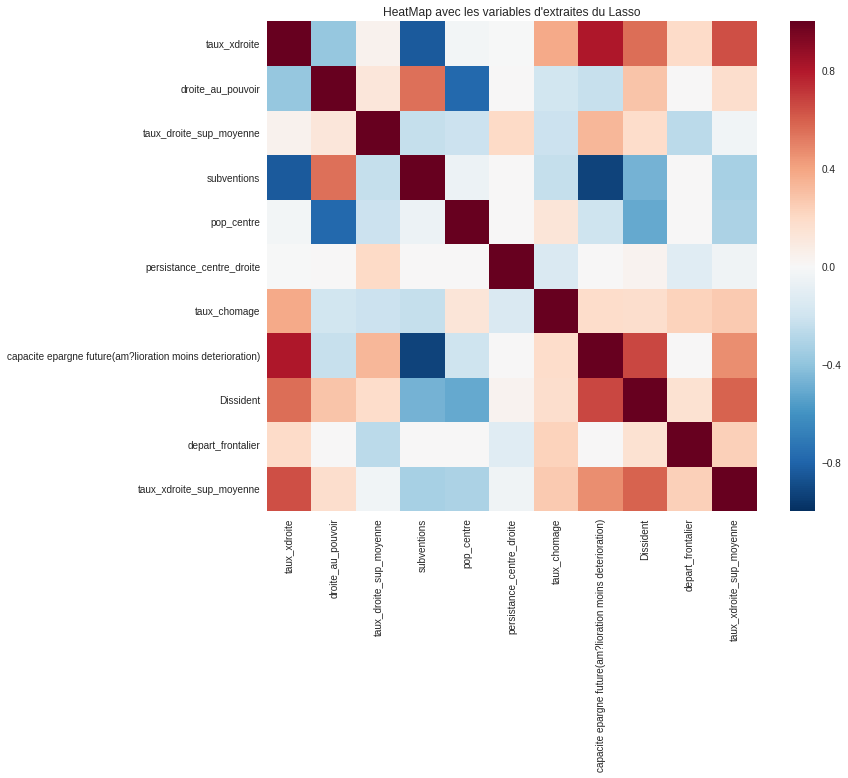

In [22]:
liste_features = ["taux_xdroite","droite_au_pouvoir","taux_droite_sup_moyenne","subventions","pop_centre",
                 "persistance_centre_droite","taux_chomage","capacite epargne future(am?lioration moins deterioration)",
                 "Dissident","depart_frontalier","taux_xdroite_sup_moyenne"]
xdroite_mat = dft11.ix[:, liste_features].corr()
# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(12, 9))
# Draw the heatmap using seaborn
sns.heatmap(xdroite_mat, vmax=1, square=True)
plt.title("HeatMap avec les variables d'extraites du Lasso")
plt.show()

In [23]:
# Corrélation significative
print(pearsonr(dft11.ix[:, "subventions"], dft11.ix[:, "taux_xdroite"]))
print(spearmanr(dft11.ix[:, "subventions"], dft11.ix[:, "taux_xdroite"]))
print(pearsonr(dft11.ix[:, "capacite epargne future(am?lioration moins deterioration)"], dft11.ix[:, "taux_xdroite"]))
print(spearmanr(dft11.ix[:, "capacite epargne future(am?lioration moins deterioration)"], dft11.ix[:, "taux_xdroite"]))

(-0.84013165537400447, 1.227717388682091e-154)
SpearmanrResult(correlation=-0.75433624492940221, pvalue=5.4005301614771731e-107)
(0.8118589685271328, 2.9573019470585734e-136)
SpearmanrResult(correlation=0.63771037945936282, pvalue=4.4840183388346038e-67)


In [24]:
print(pearsonr(dft11.ix[:, "taux_bdroite"], dft11.ix[:, "taux_xdroite"]))
print(spearmanr(dft11.ix[:, "taux_bdroite"], dft11.ix[:, "taux_xdroite"]))
print("\n")
print(pearsonr(dft11.ix[:, "taux_bgauche"], dft11.ix[:, "taux_xdroite"]))
print(spearmanr(dft11.ix[:, "taux_bgauche"], dft11.ix[:, "taux_xdroite"]))

(-0.59582438975884333, 1.225067734075299e-56)
SpearmanrResult(correlation=-0.6263621171933339, pvalue=4.3357982416088859e-64)


(-0.38911000369492599, 2.916719686761421e-22)
SpearmanrResult(correlation=-0.34286688601877469, pvalue=2.4754580747047025e-17)


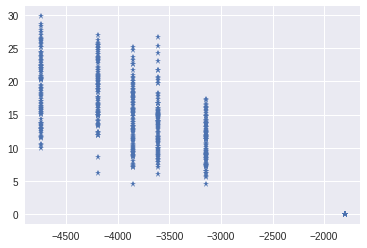

In [25]:
plt.plot(dft11.ix[:, "subventions"], dft11.ix[:, "taux_xdroite"],"*")
plt.show()

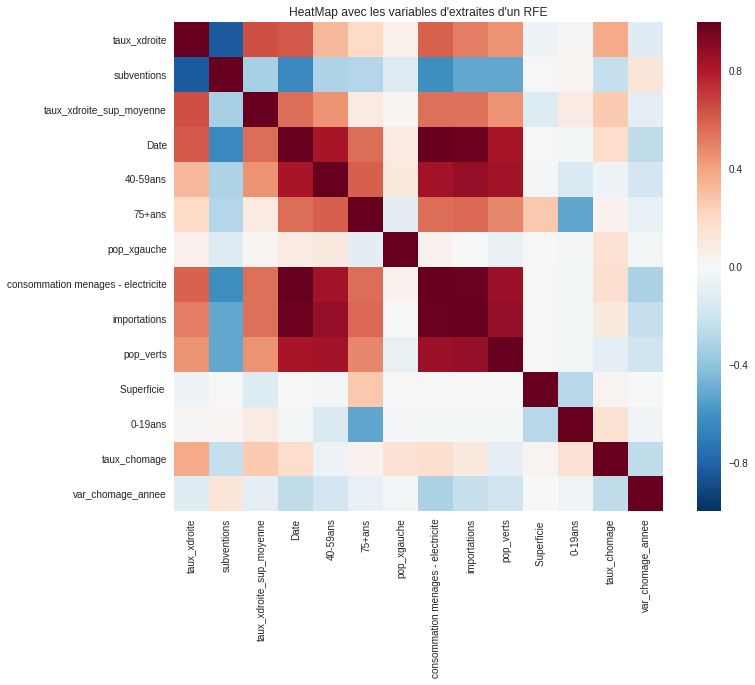

In [26]:
liste_features = ["taux_xdroite",'subventions', "taux_xdroite_sup_moyenne",'Date',
                 '40-59ans','75+ans','pop_xgauche','consommation menages - electricite',
                 'importations','pop_verts','Superficie ','0-19ans',"taux_chomage","var_chomage_annee"]
xdroite_mat = dft11.ix[:, liste_features].corr()
# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(12, 9))
# Draw the heatmap using seaborn
sns.heatmap(xdroite_mat, vmax=1, square=True)
plt.title("HeatMap avec les variables d'extraites d'un RFE")
plt.show()

Subvention est trop corrélé à la cible et est donc très colléré à nos variables discriminante
l'ajout de variable n'améliore pas le modèle
par ailleurs supprimer subvention pourrie notre modèle
#### Suppression de l'année 1981 pour le fn

In [27]:
svr = linear_model.Lasso(alpha=0.01, normalize=True, max_iter=5000, random_state=42)
target_and_predict("taux_xdroite",dft11, svr, True, True)
# Amélioration avec la supprésion de l'année 1981 4.15 vs 3.58

Avec l'estimateur Lasso(alpha=0.01, copy_X=True, fit_intercept=True, max_iter=5000,
   normalize=True, positive=False, precompute=False, random_state=42,
   selection='cyclic', tol=0.0001, warm_start=False)
Approche taux_xdroite
Nb itération : 43
MSE test : 18.4688825759
MAE test : 3.58549726513
R2 test : 0.0523674103745 


Features à garder
-1.30296397075 droite_au_pouvoir
-0.592447289653 taux_droite_sup_moyenne
-0.390241643513 persistance centre
-0.385210533538 taux_gauche_sup_moyenne
-0.174117226629 taux_vert_sup_moyenne
-0.0039511762261 subventions
-9.07771521483e-05 Densit?
0.00533523708396 pop_president
0.136071314962 persistance_centre_droite
1.14507709434 depart_frontalier
1.65568037417 taux_xdroite_sup_moyenne
7.58921895537 Nombre total de mariages domicili?s




In [28]:
for i in [0.01, 0.1,0.2]:
    my_Lslasso(dft11,"taux_xdroite", i, True)
    print("\n")

0.01
Index(['depart_frontalier', 'Nombre total de mariages domicili?s',
       'taux_droite_sup_moyenne', 'taux_gauche_sup_moyenne',
       'taux_vert_sup_moyenne', 'taux_xdroite_sup_moyenne', 'pop_president',
       'droite_au_pouvoir', 'Densit?', 'persistance centre',
       'persistance_centre_droite', 'subventions'],
      dtype='object')
R2 train 0.768032668087
MAE test 3.88253256098


0.1
Index(['taux_xdroite_sup_moyenne', 'subventions'], dtype='object')
R2 train 0.614531693101
MAE test 2.30368315506


0.2
Index([], dtype='object')
Tout les coéfficients sont nuls




In [29]:
# Création new variable
df_train_x, df_train_y, df_test_x, df_test_y = create_train_and_test("taux_xdroite", dft11, option_fn=True)

In [30]:
model = LinearRegression()
ss = StandardScaler()

df_train_x_select_features = df_train_x.ix[:, ["subventions",
                                               "taux_xdroite_sup_moyenne"]]
df_test_x_select_features = df_test_x.ix[:, ["subventions",
                                               "taux_xdroite_sup_moyenne"]]
df_train_x_select_features = ss.fit_transform(df_train_x_select_features)
df_test_x_select_features = ss.transform(df_test_x_select_features)

model.fit(df_train_x_select_features, df_train_y)
print(metrics.mean_absolute_error(df_test_y, model.predict(df_test_x_select_features)))

2.30368315506


In [31]:
np.mean(model.predict(df_test_x_select_features))

19.343900573346186

In [32]:
# Analyse sans normaliser les données
svr = linear_model.Lasso(alpha=0.8, normalize=False, max_iter=5000, random_state=42)
target_and_predict("taux_xdroite",dft11, svr, True, True)
# Sans normaliser encore plus performant

Avec l'estimateur Lasso(alpha=0.8, copy_X=True, fit_intercept=True, max_iter=5000,
   normalize=False, positive=False, precompute=False, random_state=42,
   selection='cyclic', tol=0.0001, warm_start=False)
Approche taux_xdroite
Nb itération : 2573
MSE test : 10.3632817004
MAE test : 2.72823289051
R2 test : 0.468263256623 


Features à garder
-0.231598709707 taux_droite_sup_moyenne
-0.00504241197113 subventions
-0.000452981109736 Densit?
-0.000359320463023 Superficie 
-0.000202734325943 consommation menages - electricite
2.90254064024e-06 0-19ans
8.76729260297e-05 importations
0.0136742286915 densit?_m?decins
1.7058732295 taux_xdroite_sup_moyenne




In [33]:
# Teste LsLasso sans normaliser et sans 1981
for i in np.linspace(0.6, 1.5, 10):
    my_Lslasso(dft11,"taux_xdroite", i, True, False)
    print("\n")

0.6
Index(['0-19ans', '60-74ans', 'taux_chomage', 'taux_droite_sup_moyenne',
       'taux_gauche_sup_moyenne', 'taux_xdroite_sup_moyenne', 'Superficie ',
       'Densit?', 'importations', 'subventions', 'densit?_m?decins',
       'consommation menages - electricite'],
      dtype='object')
R2 train 0.756247067354
MAE test 3.09157466417


0.7
Index(['0-19ans', '60-74ans', 'taux_droite_sup_moyenne',
       'taux_gauche_sup_moyenne', 'taux_xdroite_sup_moyenne', 'Superficie ',
       'Densit?', 'importations', 'subventions', 'densit?_m?decins',
       'consommation menages - electricite'],
      dtype='object')
R2 train 0.753039565106
MAE test 3.35297440708


0.8
Index(['0-19ans', 'taux_droite_sup_moyenne', 'taux_xdroite_sup_moyenne',
       'Superficie ', 'Densit?', 'importations', 'subventions',
       'densit?_m?decins', 'consommation menages - electricite'],
      dtype='object')
R2 train 0.734257830312
MAE test 2.97365018862


0.9
Index(['0-19ans', 'taux_droite_sup_moyenne', 'taux_xdr

In [34]:
#df_train_x, df_train_y, df_test_x, df_test_y = create_train_and_test("taux_xdroite", dft11)
#skb = SelectKBest(f_regression, k=10)
#skb.fit(df_train_x, df_train_y)
#skb_result = sorted(zip(skb.scores_, skb.pvalues_ ,df_train_x.columns))

#[ print(skb_result[i]) for i in skb.get_support(True)]

In [35]:
#sfm = SelectFromModel(svc, threshold=0.4)
#sfm.fit(df_train_x, df_train_y)
#print(df_train_x.columns[sfm.get_support(True)])
#print("\n")
#dtr = DecisionTreeRegressor()
#sfm = SelectFromModel(dtr, threshold=0.1)
#sfm.fit(df_train_x, df_train_y)
#print(df_train_x.columns[sfm.get_support(True)])

In [36]:
df_train_x, df_train_y, df_test_x, df_test_y = create_train_and_test("taux_xdroite", dft11, True)

mat_cor = pd.concat([df_train_x, df_train_y], axis=1)



xdroite_corr = pd.DataFrame(columns=["name","corr_pearson",
                                    "corr_pearson_pvalue","corr_spearman",
                                    "corr_sperman_pvalue"])
for i in range(1, mat_cor.shape[1]):
    xdroite_corr = xdroite_corr.append(
        {"name" : mat_cor.columns[i],
        "corr_pearson": pearsonr(mat_cor.ix[:, i], mat_cor.ix[:, "taux_xdroite"])[0],
        "corr_pearson_pvalue": round(pearsonr(mat_cor.ix[:, i], mat_cor.ix[:, "taux_xdroite"])[1], 5),
        "corr_spearman": spearmanr(mat_cor.ix[:, i], mat_cor.ix[:, "taux_xdroite"])[0],
        "corr_sperman_pvalue": round(spearmanr(mat_cor.ix[:, i], mat_cor.ix[:, "taux_xdroite"])[1], 5),
       },
        ignore_index=True
        )

In [37]:
# On conserve les variables qui sont pertinante sur les deux tests
# les pvalues sont équivalentes que les variables soit centré-réduite ou non
# on peut donc trier nos data 
# on fixe la condition seulement sur sperman => permet de conserver d'avantage de variable
xdroite_corr2 = xdroite_corr[(xdroite_corr["corr_sperman_pvalue"]<=0.05) ]

# plus besoin des pvalues puisque l'on à vérifié la condition de rejet sur h0
del xdroite_corr2["corr_sperman_pvalue"]
del xdroite_corr2["corr_pearson_pvalue"]

In [38]:
xdroite_corr2.shape

(35, 3)

In [39]:
xdroite_var_select = xdroite_corr2[(xdroite_corr2["corr_spearman"]>=0.2)|(xdroite_corr2["corr_spearman"]<=-0.2)]

In [40]:
xdroite_var_select.to_csv("corr_sperman.csv", sep=";")


In [41]:
# Il faut maintenant choisir les variables à selectionner 
# Cad garder des variables discriminantes et non corrélée 
features_select_corr = mat_cor.ix[:, xdroite_var_select["name"]].corr()

features_select_corr[abs(features_select_corr.ix[:,:])>=0.5].to_csv("features_corr_features.csv",sep=",")

In [42]:
df_train_x, df_train_y, df_test_x, df_test_y = create_train_and_test("taux_xdroite", dft11, True)

In [43]:
# on supprime les variables qui sont trop corrélée avec d'autres
features_keep = ['75+ans', 'var_chomage_annee', 'taux_droite_sup_moyenne',
       'taux_gauche_sup_moyenne', 'taux_xdroite_sup_moyenne',
       'droite_au_pouvoir',
       'capacit? epargne actuelle (augmentation moins diminution)',
       'ecart_pop']

df_train_x, df_train_y, df_test_x, df_test_y = create_train_and_test("taux_xdroite", dft11, True)
df_train_x_select_features = df_train_x.ix[:, features_keep]
df_test_x_select_features = df_test_x.ix[:, features_keep]

lr = LinearRegression(fit_intercept=True, normalize=True)
lr.fit(df_train_x_select_features, df_train_y)
print(df_test_x_select_features.columns)
print("R2 train %s" % lr.score(df_train_x_select_features, df_train_y))
print("MAE train %s" % metrics.mean_absolute_error(df_train_y, lr.predict(df_train_x_select_features)))
print("MAE test %s" % metrics.mean_absolute_error(df_test_y, lr.predict(df_test_x_select_features)))
print("\n")
print("Résultat avec fit entire data")
df_train_x, df_train_y = create_train("taux_xdroite", dft11, True)
df_train_x_select_features = df_train_x.ix[:, features_keep]
lr = LinearRegression(fit_intercept=True, normalize=True)
lr.fit(df_train_x_select_features, df_train_y)
print("R2 train %s" % lr.score(df_train_x_select_features, df_train_y))
print("MAE train %s" % metrics.mean_absolute_error(df_train_y, lr.predict(df_train_x_select_features)))
        

Index(['75+ans', 'var_chomage_annee', 'taux_droite_sup_moyenne',
       'taux_gauche_sup_moyenne', 'taux_xdroite_sup_moyenne',
       'droite_au_pouvoir',
       'capacit? epargne actuelle (augmentation moins diminution)',
       'ecart_pop'],
      dtype='object')
R2 train 0.733588378755
MAE train 2.04775896773
MAE test 3.51166013224


Résultat avec fit entire data
R2 train 0.727268104966
MAE train 2.13956321199


In [44]:
features_keep = ['75+ans', 'var_chomage_annee', 'taux_droite_sup_moyenne',
       'taux_gauche_sup_moyenne', 'taux_xdroite_sup_moyenne',
       'pop_premier_ministre', 'subventions']

df_train_x, df_train_y, df_test_x, df_test_y = create_train_and_test("taux_xdroite", dft11, True)
df_train_x_select_features = df_train_x.ix[:, features_keep]
df_test_x_select_features = df_test_x.ix[:, features_keep]

lr = LinearRegression(fit_intercept=True, normalize=True)
lr.fit(df_train_x_select_features, df_train_y)
print(df_test_x_select_features.columns)
print("R2 train %s" % lr.score(df_train_x_select_features, df_train_y))
print("MAE train %s" % metrics.mean_absolute_error(df_train_y, lr.predict(df_train_x_select_features)))
print("MAE test %s" % metrics.mean_absolute_error(df_test_y, lr.predict(df_test_x_select_features)))
print("\n")
print("Résultat avec fit entire data")
df_train_x, df_train_y = create_train("taux_xdroite", dft11, True)
df_train_x_select_features = df_train_x.ix[:, features_keep]
lr = LinearRegression(fit_intercept=True, normalize=True)
lr.fit(df_train_x_select_features, df_train_y)
print("R2 train %s" % lr.score(df_train_x_select_features, df_train_y))
print("MAE train %s" % metrics.mean_absolute_error(df_train_y, lr.predict(df_train_x_select_features)))

Index(['75+ans', 'var_chomage_annee', 'taux_droite_sup_moyenne',
       'taux_gauche_sup_moyenne', 'taux_xdroite_sup_moyenne',
       'pop_premier_ministre', 'subventions'],
      dtype='object')
R2 train 0.727901086506
MAE train 2.06998763282
MAE test 2.94822370277


Résultat avec fit entire data
R2 train 0.725709896217
MAE train 2.14409550798


In [80]:
features_keep = ["Nombre total de mariages domicili?s",
"taux_droite_sup_moyenne",
"taux_gauche_sup_moyenne",
"taux_xdroite_sup_moyenne",
"pop_xdroite",
"Densit?",
"subventions",
"pop_exec"
]

df_train_x, df_train_y, df_test_x, df_test_y = create_train_and_test("taux_xdroite", dft11, False)
df_train_x_select_features = df_train_x.ix[:, features_keep]
df_test_x_select_features = df_test_x.ix[:, features_keep]

lr = LinearRegression(fit_intercept=True, normalize=True)
lr.fit(df_train_x_select_features, df_train_y)
print(lr.coef_)
print(df_test_x_select_features.columns)
print("Résultat sans 2012 (avec test)")
print("R2 adjust train %s" % r2_adjusted(df_train_x_select_features, df_train_y, 8,lr))
print("R2 train %s" % lr.score(df_train_x_select_features, df_train_y))
print("MAE train %s" % metrics.mean_absolute_error(df_train_y, lr.predict(df_train_x_select_features)))
print("MAE test %s" % metrics.mean_absolute_error(df_test_y, lr.predict(df_test_x_select_features)))
print("\n")
print("Résultat avec fit entire data")
df_train_x, df_train_y = create_train("taux_xdroite", dft11, False)
df_train_x_select_features = df_train_x.ix[:, features_keep]
lr = LinearRegression(fit_intercept=True, normalize=True)
lr.fit(df_train_x_select_features, df_train_y)
print(lr.coef_)
print("R2 train %s" % lr.score(df_train_x_select_features, df_train_y))
print("R2 adjust train %s" % r2_adjusted(df_train_x_select_features, df_train_y, 8,lr))
print("MAE train %s" % metrics.mean_absolute_error(df_train_y, lr.predict(df_train_x_select_features)))


[  2.27149087e+00  -5.88550764e-01  -3.34079206e-01   2.20737909e+00
  -1.68566858e-01  -8.80374351e-05  -6.88453592e-03   8.76801123e-02]
Index(['Nombre total de mariages domicili?s', 'taux_droite_sup_moyenne',
       'taux_gauche_sup_moyenne', 'taux_xdroite_sup_moyenne', 'pop_xdroite',
       'Densit?', 'subventions', 'pop_exec'],
      dtype='object')
Résultat sans 2012 (avec test)
R2 adjust train 0.893014973353
R2 train 0.894801779644
MAE train 1.73662428531
MAE test 3.32318408173


Résultat avec fit entire data
[  2.57174876e+00  -4.42551878e-01  -2.72135868e-01   1.87579453e+00
   4.27996720e-02  -1.71706520e-04  -6.68563825e-03   5.91295259e-02]
R2 train 0.884999964474
R2 adjust train 0.883377389017
MAE train 1.88759249135


In [46]:
# Résultat assez stable avec ce modèle

**L'ajout de la popularité de la xdroite fit sans l'année 2012 dégrade énormément le score sur l'échantillon de test car on observe une multiplication de la popularité entre 2007 et 2012...il faudrait trouver un indicateur plus smooth de la progréssion du fn**

1. Variable d'élection qui ont précéde
2. Supprimer l'année 2007, la croissance du fn est stopé cette année la, elle biaise peut etre nos coeff

# Entrainement du modèle finale et prédiction

In [57]:
features_keep = ["Nombre total de mariages domicili?s",
"taux_droite_sup_moyenne",
"taux_gauche_sup_moyenne",
"taux_xdroite_sup_moyenne",
"pop_xdroite",
"Densit?",
"subventions",
"pop_exec"
]

In [83]:
def list_prediction_SM(features_keep, target):
    print("Résultat avec fit entire data")
    df_train_x, df_train_y = create_train(target, dft11, False)
    df_train_x_select_features = df_train_x.ix[:, features_keep]
    df_train_x_select_features = sm.add_constant(df_train_x_select_features)
    model = sm.OLS(df_train_y , df_train_x_select_features)
    results = model.fit()
    print(results.summary())

In [84]:
list_prediction_SM(features_keep, "taux_xdroite")

Résultat avec fit entire data
                            OLS Regression Results                            
Dep. Variable:           taux_xdroite   R-squared:                       0.885
Model:                            OLS   Adj. R-squared:                  0.883
Method:                 Least Squares   F-statistic:                     545.4
Date:                Mon, 24 Apr 2017   Prob (F-statistic):          1.37e-260
Time:                        22:26:00   Log-Likelihood:                -1358.9
No. Observations:                 576   AIC:                             2736.
Df Residuals:                     567   BIC:                             2775.
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                                          coef    std err          t      P>|t|      [95.0% Conf. Int.]
----------------------------------------------------------------------------

In [48]:
# Resultat meilleur en gardant 1981
df_train_x, df_train_y = create_train("taux_xdroite", dft11, False)
df_train_x_select_features = df_train_x.ix[:, features_keep]
model_xdroite_final = LinearRegression(fit_intercept=True, normalize=True)
model_xdroite_final.fit(df_train_x_select_features, df_train_y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=True)

In [49]:
predict_table = pd.read_csv("la_base_2017.csv", encoding="latin1")

In [50]:
predict_table.ix[:,"pop_exec"] = predict_table.ix[:,"pop_premier_ministre"].iloc[0]
predict_X = predict_table.ix[:, features_keep]

In [51]:
predict_X.shape

(96, 8)

In [52]:
y_xdroite = model_xdroite_final.predict(predict_X)
df=pd.DataFrame(y_xdroite,columns=['prediction'])

In [53]:
np.mean(y_xdroite)

23.137055130711289

In [54]:
resultat_xdoite_extract = pd.concat([predict_table[["d?partement","code","Total"]],df], axis=1)

In [55]:
np.average(resultat_xdoite_extract["prediction"], weights=resultat_xdoite_extract["Total"])

23.468228488760094

In [56]:
resultat_xdoite_extract.to_csv("prediction_2017_xdroite.csv",sep=";")